<a href="https://colab.research.google.com/github/sarosene53/CNN_fashion_nmist/blob/main/cnn_grptask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#SETUP AND IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
sns.set(style="whitegrid")

In [4]:
#DATA LOADING AND PRE-PROCESSING
print("\n Loading Data")
# Load Fashion MNIST directly from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# A. Normalization (Scaling pixel values to 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# B. Reshaping for different models
# For ML (Logistic Regression) and ANN: Flatten 28x28 images to 1D vector of 784
x_train_flat = x_train.reshape((-1, 784))
x_test_flat = x_test.reshape((-1, 784))

# For CNN: Reshape to (28, 28, 1) to include channel dimension (grayscale)
x_train_cnn = x_train.reshape((-1, 28, 28, 1))
x_test_cnn = x_test.reshape((-1, 28, 28, 1))

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


 Loading Data
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)



 Visualizing Data


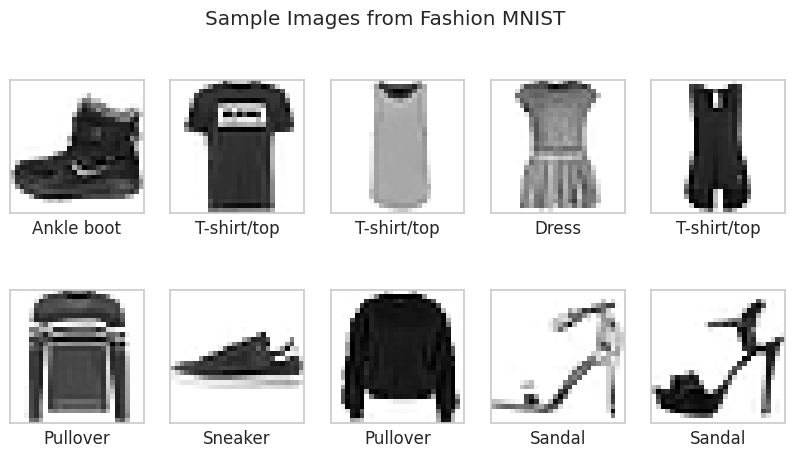

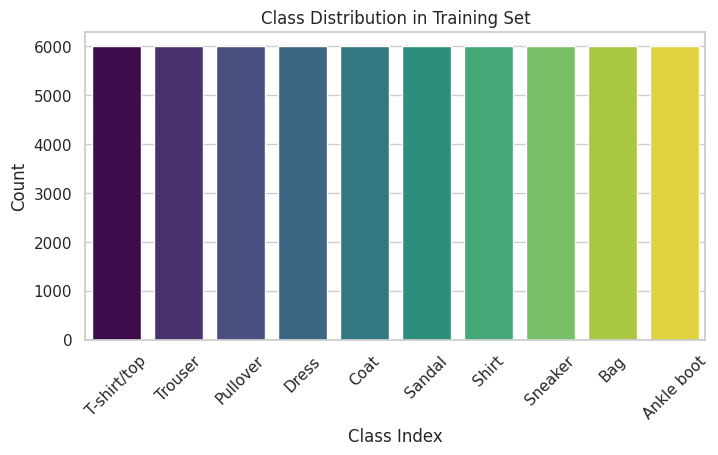

In [6]:
# VISUALIZATION AND EXPLORATION
print("\n Visualizing Data")

# Visualize Sample Images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.suptitle("Sample Images from Fashion MNIST")
plt.show()

# Explore Class Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, hue=y_train, palette="viridis", legend=False)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class Index")
plt.ylabel("Count")
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.show()

In [9]:
# MODEL IMPLEMENTATION
def evaluate_model(model_name, y_true, y_pred, fit_time=None):
    print(f"\nResults for {model_name}:")
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return acc

# Dictionary to store results for comparison
results = {}


 Training CNN 
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7570 - loss: 0.6823 - val_accuracy: 0.8739 - val_loss: 0.3516
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.8779 - loss: 0.3383 - val_accuracy: 0.8831 - val_loss: 0.3180
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.8985 - loss: 0.2814 - val_accuracy: 0.8947 - val_loss: 0.2909
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9071 - loss: 0.2508 - val_accuracy: 0.9053 - val_loss: 0.2647
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9164 - loss: 0.2223 - val_accuracy: 0.9083 - val_loss: 0.2594
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9250 - loss: 0.2067 - val_accuracy: 0.9118 - val_loss: 0.2438
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9348 - loss: 0.1775 - val_accuracy: 0.9093 - val_loss: 0.2567
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - ac

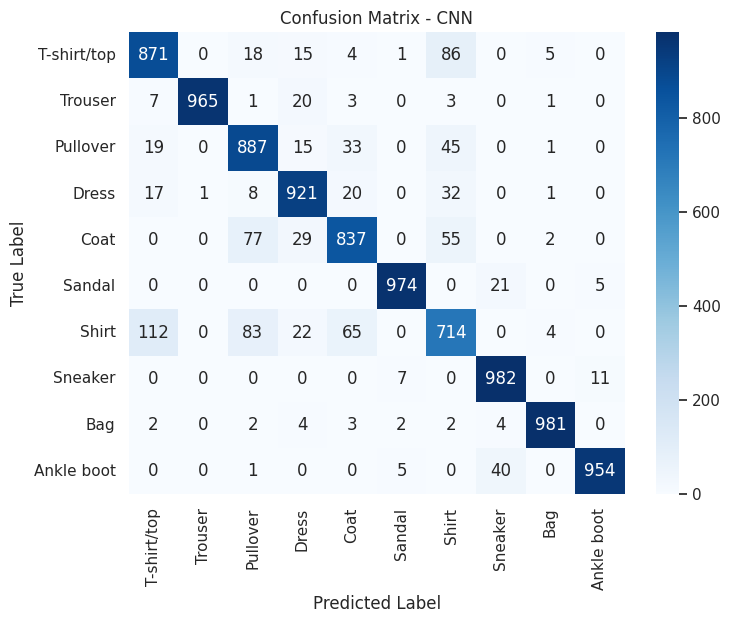

In [13]:
# Convolutional Neural Network (CNN) Implementation
print("\n Training CNN ")
# CNN Architecture Used: Conv2D -> MaxPool -> Conv2D -> MaxPool -> Flatten -> Dense -> Output
cnn_model = models.Sequential([
    keras.Input(shape=(28, 28, 1)),   # Explicit input object
    layers.Conv2D(32, (3, 3), activation='relu'), # Removed input_shape argument here
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Training
history_cnn = cnn_model.fit(x_train_cnn, y_train, epochs=10, validation_split=0.2, verbose=1)

# Prediction
y_pred_cnn_prob = cnn_model.predict(x_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_prob, axis=1)

# Evaluation
results['CNN'] = evaluate_model("CNN", y_test, y_pred_cnn)